In [70]:
import numpy as np
import matplotlib.pyplot as plt

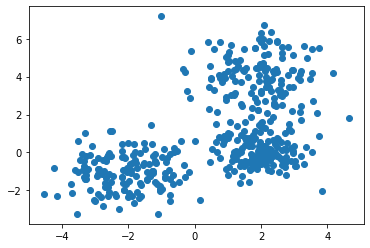

In [106]:
a = np.random.multivariate_normal([-2,-1],[[1.0,0],[0,1.0]],150).T
b = np.random.multivariate_normal([2,0],[[0.5,0],[0,.5]],150).T
c = np.random.multivariate_normal([2,4],[[1.0,0],[0,1.5]],150).T
dataset = np.hstack((a,b,c))
plt.scatter(dataset[0], dataset[1])

__Training Objective:__

Define a cost function (A metrics to measure the progress)

$ cost(X,k,\mu_1,,\mu_2,...,\mu_k) = \sum_{i=1}^k \sum_{x \in C_i } d(x,\mu_i)$

In [124]:
def distance(u,v):
    return np.linalg.norm(u-v)


def calculate_centroid(points):
    return np.mean(points,axis=0)

def find_nearest_center(point,centroids):
    closest_cluster = None
    
    min_distance = float('inf')
    for  i, centroid in enumerate(centroids):
        dist = distance(point, centroid)
        if dist < min_distance:
            min_distance = dist
            closest_cluster = i 
    return closest_cluster

def kmeans( points, k, max_error = 0.01, max_iteration = 100):
    #Initialize the centroid
    n = len(points)
    points_to_cluster = [0]*n
    # select k point among the input data as centroid of clusters
    centroids = np.random.randint(0,n,k)
    cluster_to_centroid = points[centroids]
    prev_cluster_to_centroid =  np.copy (cluster_to_centroid  )   
    
    centers_diff = float('inf')
    # while not converge
    while max_iteration > 0 and centers_diff >= max_error:
        max_iteration -= 1
        cluster_to_points = [[] for _ in range(k)]
        # assign each point to centers
        for j in range(n):
            i = find_nearest_center(points[j],cluster_to_centroid)
            
            points_to_cluster[j] = i 
            cluster_to_points[i].append(j)
        # print(cluster_to_centroid)    
        # recalculate each center to cluster mean
        for i, points_i in enumerate(cluster_to_points):
            cluster_to_centroid[i] = calculate_centroid(points[points_i])
        centers_diff = distance(prev_cluster_to_centroid,cluster_to_centroid)
        print (centers_diff)
        prev_cluster_to_centroid = np.copy (cluster_to_centroid  )   
    return points_to_cluster
        
    

In [125]:
points = dataset.T
points_to_cluster = kmeans(points, k=3)

1.4971347108787711
0.2814619165406826
0.09587321089055229
0.03847894186998257
0.0


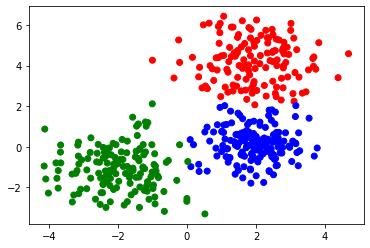

In [95]:
colormap = np.array(['r','g','b'])
plt.scatter(dataset[0], dataset[1],c = colormap[points_to_cluster])